<a href="https://colab.research.google.com/github/DashDeipayan/Convolutional-Neural-Network/blob/master/CNN_Using_Keras_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import sys
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [10]:
(X_train_orig,Y_train),(X_test_orig,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0
Y=to_categorical(Y_train,num_classes=10,dtype='float32')
Y_test = to_categorical(Y_test,num_classes =10,dtype='float32')

In [12]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [0]:
def input_Model(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(32,(3,3),strides = (1,1), name = 'conv0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'max_pool')(X)
    X = Dropout((0.2), name = 'dropout')(X)
    
    X = Conv2D(64,(3,3),strides = (1,1))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Dropout((0.2))(X)
        
    X = Conv2D(128,(3,3),strides = (1,1))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Dropout((0.2))(X)
    
    X = Flatten()(X)
    X = Dense(128, activation = 'relu')(X)
    X = Dropout((0.2))(X)
    X = Dense(10, activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'input_Model')
    
    return model
    

In [0]:
inputmodel = input_Model(X_train.shape[1:])

In [0]:
inputmodel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [19]:
inputmodel.fit(x = X_train, y = Y, epochs = 50, batch_size = 50)



W0709 04:54:46.679253 139892660815744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.6068 - acc: 0.4124
Epoch 2/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2509 - acc: 0.5518
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0976 - acc: 0.6107
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9957 - acc: 0.6456
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9342 - acc: 0.6712
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.8802 - acc: 0.6900
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.8366 - acc: 0.7048
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8026 - acc: 0.7170
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7778 - acc: 0.7241
Epoch 10/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7540 - 

In [20]:
preds = inputmodel.evaluate(X_test, Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 1s 97us/step

Loss = 0.6184153127193451
Test Accuracy = 0.7947


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/iu.jpeg" "iu.jpeg"

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


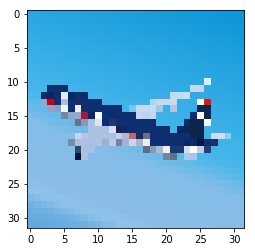

In [23]:
img_path  = "iu.jpeg" 
img = image.load_img(img_path, target_size=(32, 32))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(inputmodel.predict(x))

In [0]:
op=inputmodel.predict(x)

In [25]:
np.argmax(op)+1

1

In [26]:
listName = ["Aeroplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
print(listName[np.argmax(op)])

Aeroplane
